# Stock Clustering using Machine Learning

In this exercise, we want to use the K-Means Machine Learning Algorithm to cluster companies according to their stock value development.
Let's see if we can identify similar companies. 

In [5]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [6]:
data = pd.read_csv('SP500_prices.csv')

In [7]:
companies_dict={ 
    'AMZN': 'Amazon',
    'AAPL': 'Apple',
    'WBA': 'Walgreen',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'LMT': 'Lockheed Martin',
    'MCD': 'McDonalds',
    'INTC': 'Intel',
    'IBM': 'IBM',
    'TXN': 'Texas Instruments',
    'MA': 'MasterCard',
    'MSFT': 'Microsoft',
    'GE': 'General Electric',
    'AXP': 'American Express',
    'PEP': 'Pepsi',
    'KO': 'Coca Cola',
    'JNJ': 'Johnson & Johnson',
    'TM': 'Toyota',
    'HMC': 'Honda',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'VLO': 'Valero Energy',
    'F': 'Ford',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'JPM': 'JP Morgan'
}
tickers = list(companies_dict.keys())

In [8]:
for c in data.columns[1:]:
    if c not in tickers:
        data = data.drop([c], axis=1)
        

In [9]:
data.date = pd.to_datetime(data.date)
data = data[data.date > "2016"][data.date < "2020"]

In [10]:
data.index = data["date"]
data.drop(columns=["date"],inplace=True)

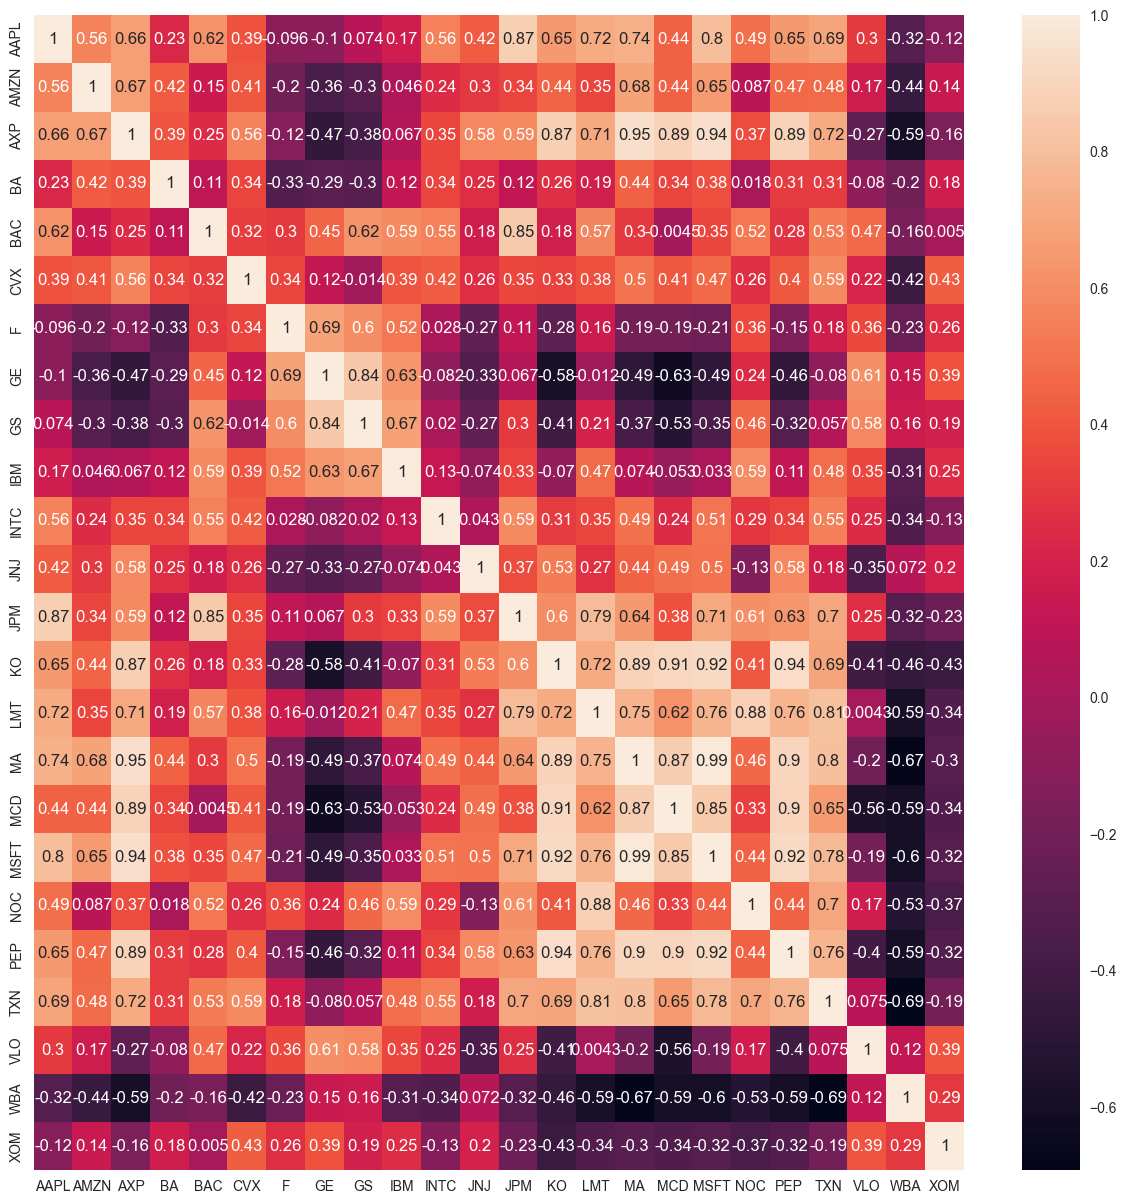

In [11]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
returns = data.pct_change()

In [13]:
# we can only work with stocks that have the full return series
returns = returns.iloc[1:,:].dropna(axis=1)

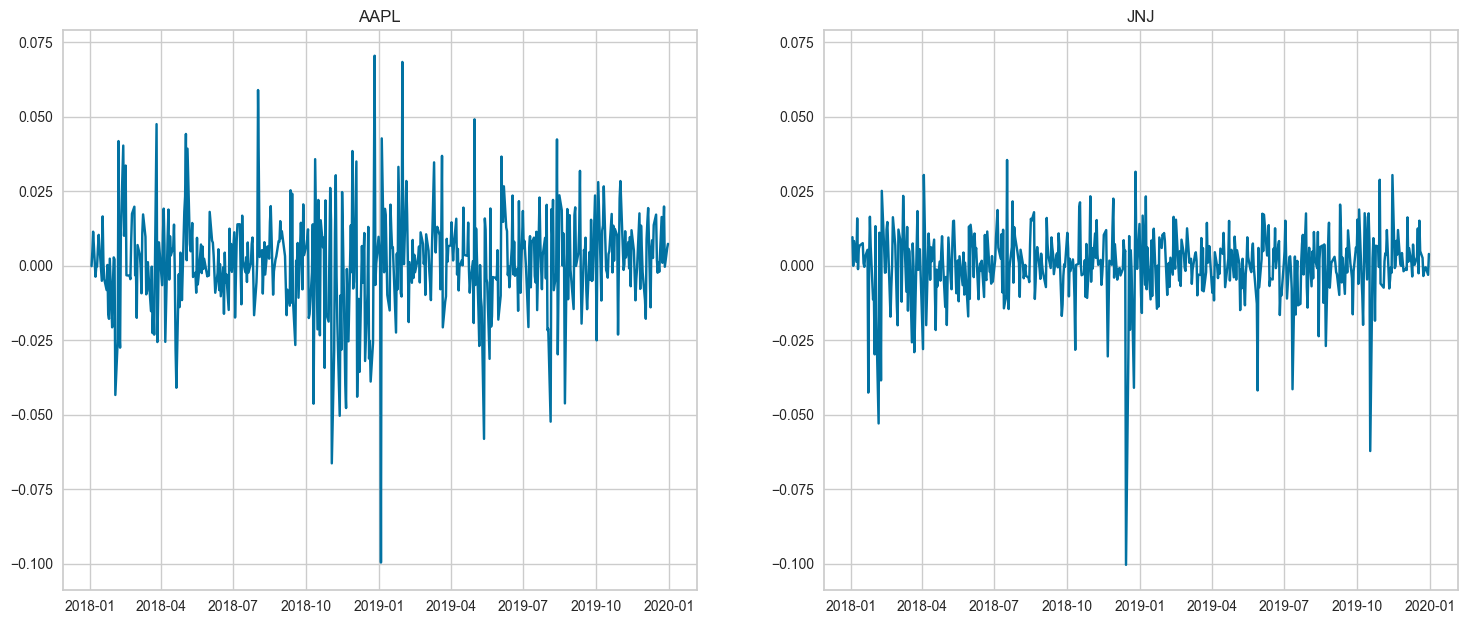

In [14]:
# Compare the movement of different stocks. 

plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(returns["AAPL"])
plt.title("AAPL")

plt.subplot(222, sharey=ax1)
plt.plot(returns["JNJ"])
plt.title("JNJ")
plt.show()

In [15]:
ret_T = np.array(returns).T

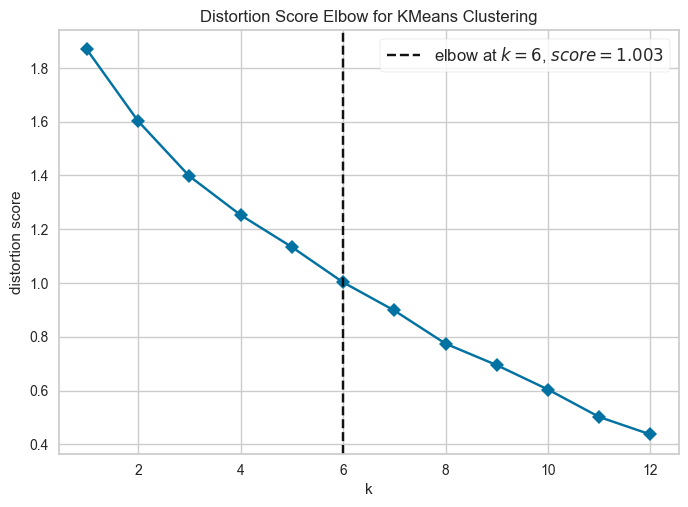

In [16]:
# Create k-Means model and find optimal number of clusters with the elbow method
# If visulizer.fit does not work, try to downgrade numpy (pip install numpy==1.21.4) 

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,13), timings=False
)

visualizer.fit(ret_T)        
visualizer.show()
p = visualizer.elbow_value_

In [17]:
# Create and fit the model with the optimal number of clusters from above
model = KMeans(n_clusters = p)
model.fit(ret_T)

labels = model.predict(ret_T)

# create a DataFrame aligning labels & companies
clusters = pd.DataFrame({'cluster': labels, 'ticker': returns.columns})

for i in clusters.index:
    clusters.loc[i,"company"] = companies_dict[clusters.loc[i,"ticker"]]

# display df sorted by cluster labels. Would you say that the clustering makes sense?
clusters.sort_values('cluster').reset_index(drop=True)

,cluster,ticker,company
0,0,GE,General Electric
1,1,XOM,Exxon
2,1,VLO,Valero Energy
3,1,AXP,American Express
4,1,BAC,Bank of America
5,1,CVX,Chevron
6,1,F,Ford
7,1,GS,Goldman Sachs
8,1,JPM,JP Morgan
9,1,WBA,Walgreen
